In [1]:
# Dependencies
# ----------------------------------
# Imports the method used for connecting to DBs
from sqlalchemy import create_engine


# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float, Date

#Import Pandas
import pandas as pd

#Import datetime
import datetime

In [2]:
#get the file
oct_df = "data/202010-citibike-tripdata.csv"
nov_df = "data/202011-citibike-tripdata.csv"
dec_df = "data/202012-citibike-tripdata.csv"
jan_df = "data/202101-citibike-tripdata.csv"
covid_df = "data/ccases.csv"

In [3]:
#read the data file
df_oct = pd.read_csv(oct_df)
df_nov = pd.read_csv(nov_df)
df_dec = pd.read_csv(dec_df)
df_jan = pd.read_csv(jan_df)
df_covid = pd.read_csv(covid_df)

In [4]:
#combine citibike dataframe
frames = [df_oct, df_nov, df_dec, df_jan]

In [5]:
citibike = pd.concat(frames)

In [6]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1403,2020-10-01 00:00:10.7870,2020-10-01 00:23:34.5400,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1
1,462,2020-10-01 00:00:18.2390,2020-10-01 00:08:00.5710,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2
2,770,2020-10-01 00:00:21.3070,2020-10-01 00:13:12.0840,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,47398,Customer,1996,1
3,233,2020-10-01 00:00:25.0080,2020-10-01 00:04:18.6410,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1
4,126,2020-10-01 00:00:25.3100,2020-10-01 00:02:32.1330,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1


In [7]:
citibike["starttime"] = pd.to_datetime(citibike["starttime"])

In [8]:
citibike["date"] = citibike["starttime"].dt.date

In [9]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1403,2020-10-01 00:00:10.787,2020-10-01 00:23:34.5400,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1,2020-10-01
1,462,2020-10-01 00:00:18.239,2020-10-01 00:08:00.5710,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2,2020-10-01
2,770,2020-10-01 00:00:21.307,2020-10-01 00:13:12.0840,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,47398,Customer,1996,1,2020-10-01
3,233,2020-10-01 00:00:25.008,2020-10-01 00:04:18.6410,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1,2020-10-01
4,126,2020-10-01 00:00:25.310,2020-10-01 00:02:32.1330,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1,2020-10-01


In [10]:
citibike_by_date = citibike.groupby([citibike['date']]).starttime.count()

In [11]:
citibike_by_date = pd.DataFrame(citibike_by_date)

In [12]:
citibike_by_date.head()

,starttime
date,
2020-10-01,89718
2020-10-02,81001
2020-10-03,95562
2020-10-04,80662
2020-10-05,75795


In [13]:
citibike_by_date=citibike_by_date.rename(columns={"date": "date", "starttime": "no_of_trip"})

In [14]:
citibike_by_date.head()

,no_of_trip
date,
2020-10-01,89718
2020-10-02,81001
2020-10-03,95562
2020-10-04,80662
2020-10-05,75795


In [15]:
df_covid.head()

,Date,Confirmed Cases,cases_per_day,Deaths,Deaths per day
0,01/10/2020,241979,615,55010,40
1,02/10/2020,242575,596,55058,48
2,03/10/2020,242851,276,55083,25
3,04/10/2020,243187,336,55127,44
4,05/10/2020,243951,764,55183,56


In [16]:
df_covid["Date"] = pd.to_datetime(df_covid["Date"], format='%d/%m/%Y')

In [17]:
df_covid["date"] = df_covid["Date"].dt.date

In [18]:
df_covid.head()

,Date,Confirmed Cases,cases_per_day,Deaths,Deaths per day,date
0,2020-10-01,241979,615,55010,40,2020-10-01
1,2020-10-02,242575,596,55058,48,2020-10-02
2,2020-10-03,242851,276,55083,25,2020-10-03
3,2020-10-04,243187,336,55127,44,2020-10-04
4,2020-10-05,243951,764,55183,56,2020-10-05


In [19]:
covid_df_by_date = df_covid[["date","cases_per_day"]]

In [20]:
covid_df_by_date.head()

,date,cases_per_day
0,2020-10-01,615
1,2020-10-02,596
2,2020-10-03,276
3,2020-10-04,336
4,2020-10-05,764


In [21]:
citibike_covid_df = covid_df_by_date.merge(citibike_by_date, how="inner", on ="date")

In [22]:
citibike_covid_df 

,date,cases_per_day,no_of_trip
0,2020-10-01,615,89718
1,2020-10-02,596,81001
2,2020-10-03,276,95562
3,2020-10-04,336,80662
4,2020-10-05,764,75795
...,...,...,...
118,2021-01-27,4600,38982
119,2021-01-28,4467,34137
120,2021-01-29,3519,23566
121,2021-01-30,2715,27330


In [23]:
citibike_covid_df = citibike_covid_df.sort_values('date')
seven_days = pd.Timedelta(days=7)
seven_days_date = (citibike_covid_df["date"] + seven_days)
citibike_covid_df["last_seven_days_cases"] = citibike_covid_df['cases_per_day'].rolling(min_periods=0, window=7).mean()
citibike_covid_df["last_seven_days_no_of_trip"] = citibike_covid_df['no_of_trip'].rolling(min_periods=0, window=7).mean()
citibike_covid_df.head(14)

,date,cases_per_day,no_of_trip,last_seven_days_cases,last_seven_days_no_of_trip
0,2020-10-01,615,89718,615.000000,89718.000000
1,2020-10-02,596,81001,605.500000,85359.500000
2,2020-10-03,276,95562,495.666667,88760.333333
3,2020-10-04,336,80662,455.750000,86735.750000
4,2020-10-05,764,75795,517.400000,84547.600000
5,2020-10-06,566,85634,525.500000,84728.666667
6,2020-10-07,542,81263,527.857143,84233.571429
7,2020-10-08,522,83990,514.571429,83415.285714
8,2020-10-09,524,87644,504.285714,84364.285714
9,2020-10-10,312,93919,509.428571,84129.571429


In [24]:
citibike_covid_df["date"] = pd.to_datetime(citibike_covid_df["date"] , format='%Y-%m-%d')

In [25]:
citibike_covid_df["date"] = citibike_covid_df["date"].dt.date

In [26]:
citibike_covid_df.head(14)

,date,cases_per_day,no_of_trip,last_seven_days_cases,last_seven_days_no_of_trip
0,2020-10-01,615,89718,615.000000,89718.000000
1,2020-10-02,596,81001,605.500000,85359.500000
2,2020-10-03,276,95562,495.666667,88760.333333
3,2020-10-04,336,80662,455.750000,86735.750000
4,2020-10-05,764,75795,517.400000,84547.600000
5,2020-10-06,566,85634,525.500000,84728.666667
6,2020-10-07,542,81263,527.857143,84233.571429
7,2020-10-08,522,83990,514.571429,83415.285714
8,2020-10-09,524,87644,504.285714,84364.285714
9,2020-10-10,312,93919,509.428571,84129.571429


In [27]:
citibike_covid_df = citibike_covid_df.iloc[6:]

In [28]:
citibike_covid_df.head()

,date,cases_per_day,no_of_trip,last_seven_days_cases,last_seven_days_no_of_trip
6,2020-10-07,542,81263,527.857143,84233.571429
7,2020-10-08,522,83990,514.571429,83415.285714
8,2020-10-09,524,87644,504.285714,84364.285714
9,2020-10-10,312,93919,509.428571,84129.571429
10,2020-10-11,281,75426,501.571429,83381.571429


In [29]:
citibike_covid_df.to_csv(r'data/data.csv',index=False)

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
# Assign the data to X and y

X = citibike_covid_df[["last_seven_days_cases"]].values.reshape(-1, 1)
y = citibike_covid_df["last_seven_days_no_of_trip"].values.reshape(-1, 1)
print(X.shape, y.shape)

(117, 1) (117, 1)


In [32]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [33]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [34]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6742256789070582
Testing Score: 0.6764876656672402


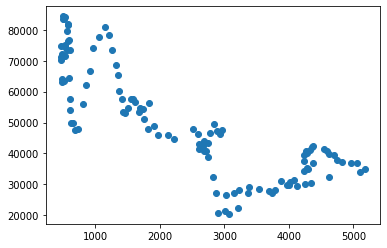

In [35]:
plt.scatter(X, y)
plt.show()

In [36]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[-9.80861441]]
y-axis intercept:  [73307.74332843]


In [37]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[465.85714286]]
Max X Value: [[5182.]]


In [38]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

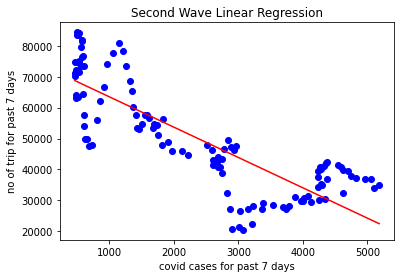

In [39]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel('covid cases for past 7 days')
plt.ylabel('no of trip for past 7 days')
plt.title('Second Wave Linear Regression')
plt.savefig('static\images\secondwavelr.jpg', dpi=300)
plt.show()
### END SOLUTION

The linear model now looks like this:

y=73307.74332843-9.80861441x

In [40]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y.ravel()).predict(X)
y_lin = svr_lin.fit(X, y.ravel()).predict(X)
y_poly = svr_poly.fit(X, y.ravel()).predict(X)

In [41]:
#svr_poly.fit(X_train, y_train.ravel()).predict(X_train)

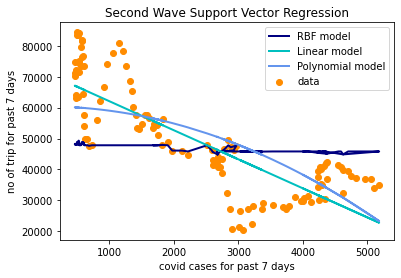

In [42]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
#plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('covid cases for past 7 days')
plt.ylabel('no of trip for past 7 days')
plt.title('Second Wave Support Vector Regression')
plt.legend()
plt.savefig('static\images\secondwavesvr.jpg', dpi=300)
plt.show()

Text(0.5, 1.0, 'Residual Plot')

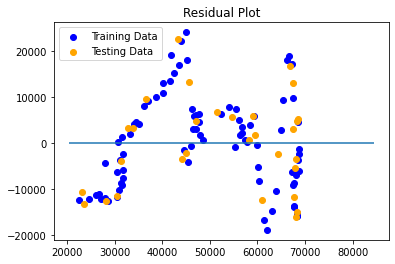

In [43]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION 
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data") 
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

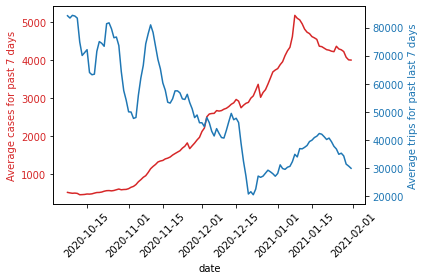

In [44]:
import matplotlib.pyplot as plt

t = citibike_covid_df['date']
data1 = citibike_covid_df['last_seven_days_cases']
data2 = citibike_covid_df['last_seven_days_no_of_trip']

fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)

color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('Average cases for past 7 days', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average trips for past last 7 days', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('static\images\secondwavelinegraph.jpg', dpi=300)
plt.show()

In [45]:
#get the file
oct19_df = "data/201910-citibike-tripdata.csv"
nov19_df = "data/201911-citibike-tripdata.csv"
dec19_df = "data/201912-citibike-tripdata.csv"
jan20_df = "data/202001-citibike-tripdata.csv"

In [46]:
#read the data file
df_oct19 = pd.read_csv(oct19_df)
df_nov19 = pd.read_csv(nov19_df)
df_dec19 = pd.read_csv(dec19_df)
df_jan20 = pd.read_csv(jan20_df)

In [47]:
#combine citibike dataframe
frames1 = [df_oct19, df_nov19, df_dec19, df_jan20]

In [48]:
citibike19 = pd.concat(frames1)

In [49]:
citibike19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,3746,6 Ave & Broome St,40.724308,-74.004730,223,W 13 St & 7 Ave,40.737815,-73.999947,41750,Subscriber,1993,1
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,3301,Columbus Ave & W 95 St,40.791956,-73.968087,3283,W 89 St & Columbus Ave,40.788221,-73.970416,18264,Subscriber,1992,1
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25525,Subscriber,1995,1
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,254,W 11 St & 6 Ave,40.735324,-73.998004,477,W 41 St & 8 Ave,40.756405,-73.990026,30186,Subscriber,1992,1
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25597,Subscriber,1992,1


In [50]:
citibike19["starttime"] = pd.to_datetime(citibike19["starttime"])

In [51]:
citibike19["date"] = citibike19["starttime"].dt.date

In [52]:
citibike_by_date19 = citibike19.groupby([citibike19['date']]).starttime.count()

In [53]:
citibike_by_date19 = pd.DataFrame(citibike_by_date19)

In [54]:
citibike_by_date19.head()

,starttime
date,
2019-10-01,87033
2019-10-02,79821
2019-10-03,39067
2019-10-04,83360
2019-10-05,69131


In [55]:
citibike_by_date19=citibike_by_date19.rename(columns={"date": "date", "starttime": "no_of_trip"})
citibike_by_date19.head(30)

,no_of_trip
date,
2019-10-01,87033
2019-10-02,79821
2019-10-03,39067
2019-10-04,83360
2019-10-05,69131
2019-10-06,60532
2019-10-07,77323
2019-10-08,80569
2019-10-09,50407


In [56]:
citibike_by_date19.to_csv('19trips.csv')

In [57]:
average_no_of_trip = citibike_by_date19["no_of_trip"].mean()
average_no_of_trip

46886.88617886179

In [58]:
N=13
prediction_df = pd.DataFrame({"no_of_cases" : range(500, N+6500,500)})
prediction_df["no_of_trip"] = (float(model.intercept_) + (float(model.coef_) * prediction_df["no_of_cases"]))
prediction_df["no_of_trip"] = prediction_df["no_of_trip"].astype(int)
prediction_df["reduced_by"] = prediction_df["no_of_trip"] - average_no_of_trip
prediction_df.loc[prediction_df["reduced_by"] <=0, "reduced_by"] = ((prediction_df["no_of_trip"] - average_no_of_trip) / average_no_of_trip)
prediction_df.loc[prediction_df["reduced_by"] >= 0, "reduced_by"] = 0
prediction_df["reduced_by"] = prediction_df["reduced_by"].round(decimals = 2)
prediction_df.head(15)

,no_of_cases,no_of_trip,reduced_by
0,500,68403,0.00
1,1000,63499,0.00
2,1500,58594,0.00
3,2000,53690,0.00
4,2500,48786,0.00
5,3000,43881,-0.06
6,3500,38977,-0.17
7,4000,34073,-0.27
8,4500,29168,-0.38
9,5000,24264,-0.48


In [59]:
# Sets an object to utilize the default declarative base in SQL Alchemy
Base = declarative_base()

In [60]:
# Creates Classes which will serve as the anchor points for our Tables
class data(Base):
    __tablename__ = 'model_data'
    index = Column(Integer, primary_key=True)
    no_of_cases = Column(Integer)
    no_of_trip = Column(Integer)
    reduced_by = Column(Integer)

In [61]:
engine = create_engine('sqlite:///modeldata.sqlite', echo=True)
sqlite_connection = engine.connect()

2021-02-20 16:09:45,715 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-02-20 16:09:45,716 INFO sqlalchemy.engine.base.Engine ()
2021-02-20 16:09:45,717 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-02-20 16:09:45,718 INFO sqlalchemy.engine.base.Engine ()


In [62]:
sqlite_table = "model_data"
prediction_df.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2021-02-20 16:09:45,725 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("model_data")
2021-02-20 16:09:45,727 INFO sqlalchemy.engine.base.Engine ()
2021-02-20 16:09:45,728 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("model_data")
2021-02-20 16:09:45,729 INFO sqlalchemy.engine.base.Engine ()
2021-02-20 16:09:45,732 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE model_data (
	"index" BIGINT, 
	no_of_cases BIGINT, 
	no_of_trip INTEGER, 
	reduced_by FLOAT
)


2021-02-20 16:09:45,733 INFO sqlalchemy.engine.base.Engine ()
2021-02-20 16:09:45,743 INFO sqlalchemy.engine.base.Engine COMMIT
2021-02-20 16:09:45,744 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_model_data_index ON model_data ("index")
2021-02-20 16:09:45,744 INFO sqlalchemy.engine.base.Engine ()
2021-02-20 16:09:45,755 INFO sqlalchemy.engine.base.Engine COMMIT
2021-02-20 16:09:45,759 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-02-20 16:09:45,760 INFO sqlalchemy.engine.base.Engine INSERT 

In [63]:
# Create a "Metadata" Layer That Abstracts our SQL Database
# ----------------------------------
# Create (if not already in existence) the tables associated with our classes.
Base.metadata.create_all(engine)

# Use this to clear out the db
# ----------------------------------
# Base.metadata.drop_all(engine)

2021-02-20 16:09:45,778 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("model_data")
2021-02-20 16:09:45,780 INFO sqlalchemy.engine.base.Engine ()


In [64]:
# Create a Session Object to Connect to DB
# ----------------------------------
# Session is a temporary binding to our DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [65]:
# Query the Tables
# ----------------------------------
# Perform a simple query of the database
data_check = session.query(data)
for data in data_check:
    print(data.reduced_by)

2021-02-20 16:09:45,803 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-02-20 16:09:45,804 INFO sqlalchemy.engine.base.Engine SELECT model_data."index" AS model_data_index, model_data.no_of_cases AS model_data_no_of_cases, model_data.no_of_trip AS model_data_no_of_trip, model_data.reduced_by AS model_data_reduced_by 
FROM model_data
2021-02-20 16:09:45,805 INFO sqlalchemy.engine.base.Engine ()
0.0
0.0
0.0
0.0
0.0
-0.06
-0.17
-0.27
-0.38
-0.48
-0.59
-0.69
-0.8
